In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def returnPoint(self):
        return (self.x, self.y)     

In [3]:
class InnerNode:
    def __init__(self, idd = None, f = None, lson = None, rson = None, maxY = None, Q = None, B = 0):
        self.idd = idd #Debugging
        self.f = f #pointer to father
        self.lson = lson #pointer to left son
        self.rson = rson #pointer to right son
        self.maxY = maxY 
        #largest y-value in subtree of lson for lc
        #largest y-value in subtree of rson for rc    
        self.Q = Q #segment of Q_a that did not contribute to Q_f
        self.B = B #number of points of Q_a that contribute to Q_f
    
    def printData(self):
        printID = self.idd
        if self.f:
            printF = self.f.idd
        else:
            printF = "NONE"
        
        if(not self.lson is None):
            printLson = self.lson.idd
        else:
            printLson = "NONE"
            
        if(not self.rson is None):
            printRson = self.rson.idd
        else:
            printRson = "NONE"
        
       # if(type(self.lson) is list):
       #     printLson = "["
       #     if(not self.lson is None):
       #         for i in range(len(self.lson)-1):
       #             printLson += "{},".format(self.lson[i].y)
       #         printLson += "{}".format(self.lson[len(self.lson)-1].y)                
       #     printLson += "]"
       # else:
       #     printLson = "None"#self.lson.y
       # if(type(self.rson) is list):
       #     printRson = "["
       #     if(not self.rson is None):
       #         for i in range(len(self.rson)-1):
       #             printRson += "{},".format(self.rson[i].y)
       #         printRson += "{}".format(self.rson[len(self.rson)-1].y)
       #     printRson += "]"
       # else:
       #     printRson = "None" #self.rson.y
        printMaxY = self.maxY
        if self.Q:
            printQ = "["
            for i in range(len(self.Q)-1):
                printQ += "({},{}),".format(self.Q[i].x,self.Q[i].y)
            printQ += "({},{})".format(self.Q[len(self.Q)-1].x, self.Q[len(self.Q)-1].y)
            printQ += "]"
        else:
            printQ = "NONE"
        if self.B:
            printB = self.B
        else:
            printB = "0"
            
        print("id: {}, f: {}, lson: {}, rson: {}, maxY: {}, Q: {}, B: {}".format(printID, printF, printLson, printRson, printMaxY, printQ, printB))
    

In [4]:
import math
def create_points_circle(r, n):
    pi = math.pi
    points = []
    for i in range(n):
        x = math.cos(2*pi*(np.random.rand()*max)/n*i)*r *(np.random.rand())
        y = math.sin(2*pi*(np.random.rand()*max)/n*i)*r *(np.random.rand())
        x = np.ceil(x+r)
        y = np.ceil(y+r)
        x = np.absolute(x)
        y = np.absolute(y)
        for j in range(len(points)):
            while(np.absolute(points[j].x - x) < 2):
                x = math.cos(2*pi*(np.random.rand()*max)/n*i)*r *(np.random.rand())
                x = np.ceil(x)
                x = np.absolute(x)
            while(np.absolute(points[j].y - y) <1):
                y = math.cos(2*pi*(np.random.rand()*max)/n*i)*r *(np.random.rand())
                y = np.ceil(y)
                y = np.absolute(y)
        
        
        
        
        p = Point(x, y)
        points.append(p)
    return points

In [5]:
import math
def create_points_arc(r, n, offsetY=0):
    pi = math.pi
    n = n * 2 
    points = []
    for i in range(n):
        x = math.cos(2*pi/n*i)*r
        y = math.sin(2*pi/n*i)*r
        if(x <= 0):
            x += r
            y += r + offsetY
            x = math.ceil(x)
            y = math.ceil(y)
            
            
            
            p = Point(x, y)
            points.append(p)
    return points

In [6]:
def plotPoints(points, Y0, showAngles=False, hull=None):
    n = len(points)
    if(showAngles == True):
        point1 = [Y0.x, Y0.y]
        for i in range(n):
            point2 = [points[i].x,points[i].y]
            x_values = [point1[0], point2[0]]
            y_values = [point1[1], point2[1]]
            plt.plot(x_values, y_values, 'b-', linewidth=0.1)
            plt.plot(point2[0], point2[1], 'b.')
    
    if hull:
        x0 = hull[0].x
        y0 = hull[0].y
        
        for p in hull[1:]:
            x1 = p.x
            y1 = p.y
            plt.plot([x0, x1], [y0, y1])
            x0, y0 = x1, y1
        
    
    for i in range(n):
        plt.plot(points[i].x, points[i].y, "b.")
    plt.plot(Y0.x, Y0.y, "go")
    plt.show()

In [7]:
def printList(points):
    for i in range(len(points)):
        print(points[i].x, points[i].y)

In [8]:
def isBetweenOLD(a, b, c):
    epsilon = 0.01
    crossproduct = (c.y - a.y) * (b.x - a.x) - (c.x - a.x) * (b.y - a.y)

    # compare versus epsilon for floating point values, or != 0 if using integers
    if abs(crossproduct) > epsilon:
        return False

    dotproduct = (c.x - a.x) * (b.x - a.x) + (c.y - a.y)*(b.y - a.y)
    if dotproduct < 0:
        return False

    squaredlengthba = (b.x - a.x)*(b.x - a.x) + (b.y - a.y)*(b.y - a.y)
    if dotproduct > squaredlengthba:
        return False

    return True

In [9]:
def isBetween(a, b, c):
    if(c.y <= a.y and c.y >= b.y):
        if(c.x <= a.x and c.x >= b.x):
            return True
        if(c.x >= a.x and c.x <= b.x):
            return True
    if(c.y >= a.y and c.y <= b.y):
        if(c.x <= a.x and c.x >= b.x):
            return True
        if(c.x >= a.x and c.x <= b.x):
            return True
    return False

In [10]:
def isIntersecting(line1, line2, isInfinite=False, case9 = False, debug=False, hull="lc"):
    epsilon = 0.01
    if(debug):
        print("----")
        print("INLINE ",line2[0][0], line2[0][1],  line2[1][0], line2[1][1])
        print("----")
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    
    #if div == 0:
    #if div <= epsilon:
        #return np.inf, np.inf
        #return False
       #raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    #return True
    
    p1 = Point(line2[0][0], line2[0][1])
    p2 = Point(line2[1][0], line2[1][1])
    if(debug):
        print("p1.x ",p1.x ,"p1.y ",p1.y , "p2.x ", p2.x,"p2.y ", p2.y, x, y)
    if(isBetween(p1, p2, Point(x,y)) or case9):
    #if(isBetween(line2[0][0], line2[1][0], x) and isBetween(line2[0][1], line2[1][1], y)):
        return x, y
    if(isInfinite):
        if(hull == "lc"):
            if(x >= line2[0][0] or x >=line2[1][0]):
                return x,y
        else:
            if(x <= line2[0][0] or x <=line2[1][0]):
                return x,y
        
    return np.inf, np.inf

#print line_intersection((A, B), (C, D))

In [11]:
### ALL DRAWING STUFF
#fig, (ax0, ax1) = plt.subplots(1, 2)

def drawQStructure(Q, ax):
    x0 = Q[0].x
    #x0 = max
    y0 = Q[0].y
    for p in Q:# range(len(Q)):
        
        x1 = p.x
        y1 = p.y
     #   plt.plot([x0, x1], [y0, y1])
      #  ax.plot([x0, x1], [y0, y1])

    #x0, y0 = x1, y1
    #ax.plot([x0, max], [y0, y1])

    
    for i in range(len(Q)):
        ax.plot(Q[i].x, Q[i].y, "b.")
        

def drawIntersection(p,q,a,b, ax):
    ax.plot([p[0], q[0]], [p[1], q[1]], 'k-', linewidth=0.5, alpha=0.7)
    ax.plot([a[0], b[0]], [a[1], b[1]], 'g-', linewidth=0.5)

def drawEdges(Q, ax):
    x0 = Q[0].x
    y0 = Q[0].y
    for p in Q:
            x1 = p.x
            y1 = p.y
            ax.plot([x0, x1], [y0, y1])
            x0, y0 = x1, y1
            
    #ax.plot([a[0], b[0]], [a[1], b[1]], 'g-', linewidth=0.5)
#        
def drawPQ(p,q,ax):
    ax.plot(p[0], p[1], "ro")
    ax.plot(q[0], q[1], "ro")
        
def drawPointColor(x, y, col, ax):
    ax.plot(x, y, col)   
        
def correctPlot(fig):
    n = len(fig.axes)
    for i in range(n):
        #fig.axes[i].change_geometry(n+1, 1, i+1)
        fig.axes[i].change_geometry(1, n+1, i+1)
    return fig

In [12]:
def scale(p1,p2,factor):
    t0=0.5*(1.0-factor)
    t1=0.5*(1.0+factor)
    x1 = p1[0] +(p2[0] - p1[0]) * t0
    y1 = p1[1] +(p2[1] - p1[1]) * t0
    x2 = p1[0] +(p2[0] - p1[0]) * t1
    y2 = p1[1] +(p2[1] - p1[1]) * t1
    return [x1,y1],[x2,y2]
    #return Point(x1,y2),Point(x2,y2)
    #self.firstPoint = Point(x1, y1)
    #self.secondPoint = Point(x2, y2)

In [13]:
def checkDuplicate(p1,p2, debug=False):
    if(debug):
        print("CHECK DUPLICATE p1:{}|{}  p2:{}|{}".format(p1[0],p1[1],p2[0],p2[1]))
    if(p1[0] - p2[0] == 0 and p1[1] - p2[1] == 0):
        return True
    return False

In [14]:
def findBridge(Q_A_IN, Q_C_IN,fig, iteration, draw=True, debug=False, hull="lc"):
    if(debug):
        print("============= ITERATION: {} =============".format(iteration))
    #t is tangent to lc-hull
    if(iteration > 6):
        return
    #figLength = len(axList)
    Q_A = Q_A_IN.copy()
    Q_C = Q_C_IN.copy()
    draw = False
    if(draw):
        figLength = len(fig.axes)
        axCurr = fig.add_subplot(figLength+1, 1, figLength+1)
    
        correctPlot(fig)
        
        drawQStructure(Q_A, axCurr)
        drawQStructure(Q_C, axCurr)
    #currAx = axList[figLength-1]
    
    #ax.plot([4,5,6])
    
   # for i in range(len(Q_A)):
    #    plt.plot(Q_A[i].x, Q_A[i].y, "b.")
            
    #for i in range(len(Q_C)):
     #   plt.plot(Q_C[i].x, Q_C[i].y, "b.")
    

    
    
    if(len(Q_A) < 2):
        pID = 0
    else:    
        pID = math.floor(len(Q_A)/2)
    
    if(len(Q_C) < 2):
        qID = 0
    else:
        qID = math.floor(len(Q_C)/2)
    
    if(debug):
        print("Q_A LENGTHT: ", len(Q_A))
        print("Q_C LENGTHT: ", len(Q_C))
    
    p = [Q_A[pID].x, Q_A[pID].y]
    q = [Q_C[qID].x, Q_C[qID].y]
    
    if(debug):
        print("::: ALL INFOS :::")
        print("Q_A")
        printList(Q_A)
        print("Q_C")
        printList(Q_C)
        print("p: ",p, "q: ",q)
       
    pScaled, qScaled = scale(p,q,10)
    t = [pScaled, qScaled]
    
    #a,b for Q_A
    #c,d for Q_C
    
    InterListA = [(Q_A[pID].x,Q_A[pID].y)]
    
    for i in range(1, len(Q_A)):
        a = [Q_A[i-1].x, Q_A[i-1].y]
        b = [Q_A[i].x, Q_A[i].y]
        
        #print("checking section {},{} - {},{}".format(a[0],a[1],b[0],b[1]))
        if(draw):
            drawIntersection(t[0], t[1], a, b, axCurr)
        intersect = isIntersecting(t,(a,b), debug=debug, hull=hull)
        if(debug):
            print("A: ",a[0],a[1],b[0],b[1],intersect)
        if(intersect[1] < np.inf ):
            InterListA.append(intersect)
            #print("Is Intersecting on A: ",intersect)
            
    #check infinite edges
        
    a = [Q_A[0].x, Q_A[0].y]
    
    if(hull == "lc"):
        b = [Q_A[0].x+max, Q_A[0].y]
    else:
        b = [Q_A[0].x-max, Q_A[0].y]
    
    if(draw):
        drawIntersection(t[0], t[1], a, b, axCurr)
    intersect = isIntersecting(t,(a,b), isInfinite=True, debug=debug, hull=hull)
    
    if(intersect[1] < np.inf ):
        InterListA.append(intersect)
    
    a = [Q_A[len(Q_A)-1].x, Q_A[len(Q_A)-1].y]
    if(hull == "lc"):
        b = [Q_A[len(Q_A)-1].x+max, Q_A[len(Q_A)-1].y]
    else:
        b = [Q_A[len(Q_A)-1].x-max, Q_A[len(Q_A)-1].y]
    
    if(draw):
        drawIntersection(t[0], t[1], a, b, axCurr)
    intersect = isIntersecting(t,(a,b), isInfinite=True, debug=debug, hull=hull)
    if(debug):
        print("C LOWER INF CASE: {}|{} -> {}|{} inter: {}<{}".format(a[0],a[1],b[0],b[1],intersect[0],intersect[1]))
    if(intersect[1] < np.inf):
        InterListA.append(intersect)
    
    
    InterListC = [(Q_C[qID].x,Q_C[qID].y)]
    
    for i in range(1, len(Q_C)):
        c = [Q_C[i-1].x, Q_C[i-1].y]
        d = [Q_C[i].x, Q_C[i].y]
        
        #print("checking section {},{} - {},{}".format(c[0],c[1],d[0],d[1]))
        if(draw):
            drawIntersection(t[0], t[1], c, d, axCurr)
        intersect = isIntersecting(t,(c,d), debug=debug, hull=hull)
        if(debug):
            print("C: ",c[0],c[1],d[0],d[1],intersect)
        if(intersect[1] < np.inf):
            InterListC.append(intersect)
            #print("Is Intersecting on C: ",intersect)
    
    #check infinite edges
    c = [Q_C[0].x, Q_C[0].y]
    
    if(hull =="lc"):
        d = [Q_C[0].x+max, Q_C[0].y]
    else:
        d = [Q_C[0].x-max, Q_C[0].y]
    
    
    if(draw):
        drawIntersection(t[0], t[1], c, d, axCurr)
    intersect = isIntersecting(t,(c,d), isInfinite=True, debug=debug, hull=hull)
    if(intersect[1] < np.inf):
        InterListC.append(intersect)
    
    c = [Q_C[len(Q_C)-1].x, Q_C[len(Q_C)-1].y]
    if(hull == "lc"):
        d = [Q_C[len(Q_C)-1].x+max, Q_C[len(Q_C)-1].y]
    else:
        d = [Q_C[len(Q_C)-1].x-max, Q_C[len(Q_C)-1].y]
    
    if(draw):
        drawIntersection(t[0], t[1], c, d, axCurr)
    intersect = isIntersecting(t,(c,d), isInfinite=True, debug=debug, hull=hull)
    if(debug):
        print("C LOWER INF CASE: {}|{} -> {}|{} inter: {}<{}".format(c[0],c[1],d[0],d[1],intersect[0],intersect[1]))
    if(intersect[1] < np.inf):
        InterListC.append(intersect)
    
    if(draw):
        drawPQ(p,q,axCurr)
    if(debug):
        print("BEFORE CLEAINGUP")
        print("INTER LIST A: {}: {}".format(len(InterListA), InterListA))
        print("INTER LIST C: {}: {}".format(len(InterListC), InterListC))
    
    
    #Check lists for duplicats
    if(len(InterListA) > 1):
        for i in range(len(InterListA)-1, 0, -1):
            #if(InterListA[i][0] - InterListA[i-1][0] == 0 and InterListA[i][1] - InterListA[i-1][1] == 0):
            if(checkDuplicate(InterListA[i], InterListA[i-1], debug=debug)):
                InterListA.pop(i)
    
    if(len(InterListC) > 1):
        for i in range(len(InterListC)-1, 0, -1):
            #if(InterListC[i][0] - InterListC[i-1][0] == 0 and InterListC[i][1] - InterListC[i-1][1] == 0):
            if(checkDuplicate(InterListC[i], InterListC[i-1], debug=debug)):
                InterListC.pop(i)
    if(debug):
        print("AFTER CLEAINGUP")
        print("INTER LIST A: {}: {}".format(len(InterListA), InterListA))
        print("INTER LIST C: {}: {}".format(len(InterListC), InterListC))
    
    #for i in range(len(InterListA)):
   #     plt.plot(InterListA[i][0], InterListA[i][1], "ro")
    
   # for i in range(len(InterListC)):
    #    plt.plot(InterListC[i][0], InterListC[i][1], "ro")
    
    if(len(InterListA) == 1):
        if(debug):
            print("p on A found!")
        pFinal = Point(InterListA[0][0], InterListA[0][1])
        
    if(len(InterListC) == 1):
        if(debug):
            print("q on C found!")
        qFinal = Point(InterListC[0][0], InterListC[0][1])
    
############################    
#### CASE DETERMINATION ####
############################

    
    
    InterA = [np.inf, np.inf]
    InterC = [np.inf, np.inf]
    
    if(len(InterListA) > 1):
        for i in range(len(InterListA)):
            if(not checkDuplicate(InterListA[i], p, debug=debug)):
                InterA = InterListA[i]

    if(len(InterListC) > 1):
        for i in range(len(InterListC)):
            if(not checkDuplicate(InterListC[i], q, debug=debug)):
                InterC = InterListC[i]

                
    if(InterA[1] < np.inf):
        if(draw):
            drawPointColor(InterA[0], InterA[1], "mo", axCurr)
        #plt.plot(InterA[0], InterA[1], "mo")
        if(debug):
            print("InterA",InterA)    
    if(InterC[1] < np.inf):
        if(draw):
            drawPointColor(InterC[0], InterC[1], "mo", axCurr)
        #plt.plot(InterC[0], InterC[1], "mo")
        if(debug):
            print("InterC",InterC)    
    
    
    if(len(InterListA) == 1 and len(InterListC) == 1):
        if(debug):
            print("Case 1")
            print("BEFORE RETURNING A")
            printList(Q_A)
            print("BEFORE RETURNING C")
            printList(Q_C)
            print("RETURNING p, q ",p,q)
        #return Q_A, Q_C
        return p, q

        
    if(len(InterListA) == 1 and len(InterListC) > 1):
        if(debug):
            print("Case 2 or 3")
        #for i in range(len(InterListC)):
         #   if(not checkDuplicate(InterListC[i], q)):
          #      print(InterListC[i][1], q[1])
        if(InterC[1] < q[1]):
            if(debug):
                print("Case 2")
            #Delete A y-lower than p
            #Delete C y-higher than q
            if(debug):
                print("BEFORE A")
                printList(Q_A)
                print("BEFORE C")
                printList(Q_C)
            if(pID == len(Q_A)-1 and len(Q_A) > 1 and False):
                Q_A.pop(pID)
            else:
                for i in range(len(Q_A)-1, pID, -1):
                    Q_A.pop(i)       
                    
            if(qID == 0 and len(Q_C) > 1):
                Q_C.pop(qID)
            else:
                for i in range(qID-1, -1, -1):
                    Q_C.pop(i)
            if(debug):
                print("AFTER A")
                printList(Q_A)
                print("AFTER C")
                printList(Q_C)
            return findBridge(Q_A, Q_C, fig, iteration+1, debug=debug, hull=hull)
        else:
            if(debug):
                print("Case 3")
                print("BEFORE A")
                printList(Q_A)
                print("BEFORE C")
                printList(Q_C)
                
            if(pID == len(Q_A)-1 and len(Q_A) > 1 and False):
                Q_A.pop(pID)
            else:
                for i in range(len(Q_A)-1, pID, -1):
                    Q_A.pop(i) 
                    
            if(qID == len(Q_C)-1 and len(Q_C) > 1):
                Q_C.pop(qID)
            else:
                for i in range(len(Q_C)-1, qID-1, -1):
                    Q_C.pop(i)
            if(debug):
                print("AFTER A")
                printList(Q_A)
                print("AFTER C")
                printList(Q_C)
            return findBridge(Q_A, Q_C, fig, iteration+1, debug=debug, hull=hull)
            
    
    if(len(InterListA) > 1 and len(InterListC) == 1):
        if(debug):
            print("Case 4 or 5")
        #for i in range(len(InterListA)):
        #    if(not checkDuplicate(InterListA[i], p)):
          #      print(InterListA[i][1], p[1])
        if(InterA[1] > p[1]):
            if(debug):
                print("Case 4")
                print("BEFORE A")
                printList(Q_A)
                print("BEFORE C")
                printList(Q_C)
                
            if(pID == len(Q_A)-1 and len(Q_A) > 1):
                Q_A.pop(pID)
            else:
                for i in range(len(Q_A)-1, pID, -1):
                    Q_A.pop(i)       
            #for i in range(qID+1, -1, -1):
            if(qID == 0 and len(Q_C) > 1 and False):
                Q_C.pop(qID)
            else:
                for i in range(qID-1, -1, -1):
                    Q_C.pop(i)
            if(debug):
                print("AFTER A")
                printList(Q_A)
                print("AFTER C")
                printList(Q_C)
            return findBridge(Q_A, Q_C, fig, iteration+1, debug=debug, hull=hull)
        else:
            if(debug):
                print("Case 5")
                print("BEFORE A")
                printList(Q_A)
                print("BEFORE C")
                printList(Q_C)
            
            if(pID == 0 and len(Q_A) > 1):
                Q_A.pop(pID)
            else: 
                for i in range(pID-1, -1, -1):
                    Q_A.pop(i)      
                    
            if(qID == 0 and len(Q_C) > 1 and False):
                Q_C.pop(qID)
            else:
                for i in range(qID-1, -1, -1):
                    Q_C.pop(i)
            if(debug):
                print("AFTER A")
                printList(Q_A)
                print("AFTER C")
                printList(Q_C)
            return findBridge(Q_A, Q_C, fig, iteration+1, debug=debug, hull=hull)
                    
    if(len(InterListA) > 1 and len(InterListC) > 1):
        if(debug):
            print("Case 6 or 7 or 8 or 9")
        if(InterA[1] > p[1] and InterC[1] < q[1]):
            if(debug):
                print("Case 6")
                print("BEFORE A")
                printList(Q_A)
                print("BEFORE C")
                printList(Q_C)
                
            if(pID == len(Q_A)-1 and len(Q_A) > 1):
                Q_A.pop(pID)
            else:                
                for i in range(len(Q_A)-1, pID, -1):
                    Q_A.pop(i)        
            if(qID == 0 and len(Q_C) > 1):
                Q_C.pop(qID)
            else:
                for i in range(qID-1, -1, -1):
                    Q_C.pop(i)
            if(debug):
                print("AFTER A")
                printList(Q_A)
                print("AFTER C")
                printList(Q_C)
            return findBridge(Q_A, Q_C, fig, iteration+1, debug=debug, hull=hull)
        if(InterA[1] < p[1] and InterC[1] < q[1]):
            if(debug):
                print("Case 7")
                print("BEFORE A")
                printList(Q_A)
                print("BEFORE C")
                printList(Q_C)
            #for i in range(len(Q_A)-1, pID-1, -1):
             #   Q_A.pop(i)       
                
            if(len(Q_C) == 1 and len(Q_A) > 1):
                Q_A.pop(pID)
            else:
                if(qID == 0 and len(Q_C) > 1):
                    Q_C.pop(qID)
                else:
                    for i in range(qID-1, -1, -1):
                        Q_C.pop(i)
            if(debug):
                print("AFTER A")
                printList(Q_A)
                print("AFTER C")
                printList(Q_C)
            return findBridge(Q_A, Q_C, fig, iteration+1, debug=debug, hull=hull)
        if(InterA[1] > p[1] and InterC[1] > q[1]):
            if(debug):
                print("Case 8")
                print("BEFORE A")
                printList(Q_A)
                print("BEFORE C")
                printList(Q_C)
            
            if(len(Q_A) == 1 and len(Q_C) > 1):
                Q_C.pop(qID)
            else:
                if(pID == len(Q_A)-1):
                    Q_A.pop(pID)
                else:
                    for i in range(len(Q_A)-1, pID-1, -1):
                        Q_A.pop(i)       
            #for i in range(qID-1, -1, -1):
            #    Q_C.pop(i)
            if(debug):
                print("AFTER A")
                printList(Q_A)
                print("AFTER C")
                printList(Q_C)
            return findBridge(Q_A, Q_C, fig, iteration+1, debug=debug, hull=hull)
            
        if(InterA[1] < p[1] and InterC[1] > q[1]):
            ###### TESTIN SOMETHING MAYBE GENIUS ########
            if(debug):
                print("Case 9")
                print("Subcase a or b")
            #Tangent of A
            p1 = (Q_A[pID].x, Q_A[pID].y)
            p2 = (Q_A[pID-1].x, Q_A[pID-1].y)
            
            #Tangent of C
            q1 = (Q_C[qID].x, Q_C[qID].y)
            q2 = (Q_C[qID-1].x, Q_C[qID-1].y)
            
            #CenterLine
            yOfQ_A = Q_A[len(Q_A)-1].y
            yOfQ_C = Q_C[len(Q_C)-1].y
            
            centerline = (yOfQ_A + yOfQ_C)/2
            intersect = isIntersecting((p1,p2),(q1,q2))
            
            if(debug):
                print("INTERSECTION ", intersect, " M ", centerline)
                print("BEFORE A")
                printList(Q_A)
                print("BEFORE C")
                printList(Q_C)
            
            if(intersect[1] <= centerline):
                if(debug):
                    print("SUBCASE A")
                if(qID == len(Q_C)-1  and len(Q_C) > 1):
                    Q_C.pop(qID)
                else:
                    for i in range(len(Q_C)-1, qID, -1):
                        Q_C.pop(i) 
            else:
                if(debug):
                    print("SUBCASE B")
                if(pID == 0  and len(Q_A) > 1):
                    Q_A.pop(pID)
                else:
                    for i in range(pID-1, -1, -1):
                        Q_A.pop(i) 
           
            if(debug):
                print("AFTER A")
                printList(Q_A)
                print("AFTER C")
                printList(Q_C)
            return findBridge(Q_A, Q_C, fig, iteration+1, debug=debug, hull=hull)
            ############################
            ######### CASE 9 ###########
            ############################

In [146]:
def calcLevel(nextNodes, debug=False, hull="lc", currID=0):
    
    #nextNodes = []
    if(debug):
        print("---------- IN CALCLEVEL -------------")
        print(len(nextNodes))
    doDraw = False
    if(len(nextNodes) < 0):
        doDraw = True
    nextnextNodes = []
    #for i in range(0, len(nextNodes)-2, +2):###########i+1 ist A i ist C
    while(len(nextNodes) >= 2):
        if(debug):
            print("LENGTH OG NEXTNODES ", len(nextNodes))
        Q_A = nextNodes[len(nextNodes)-1].Q
        Q_C = nextNodes[len(nextNodes)-2].Q
        p, q = findBridge(Q_A, Q_C, fig, 0, draw=doDraw, debug=False, hull=hull)
        
        if(debug):
            print("Q_A:")
            for i in range(len(Q_A)):
                print("({}|{})".format(Q_A[i].x, Q_A[i].y))
            print("Q_C:")
            for i in range(len(Q_C)):
                print("({}|{})".format(Q_C[i].x, Q_C[i].y))
            print(Q_A[0].y, Q_C[0].y)
            print("RECEIVED p q: ",p, q)
        Q_F = []
        if(debug):
            for j in range(len(Q_A)):
                print(Q_A[j].y)
            for j in range(len(Q_C)):
                print(Q_C[j].y)
            print("LENS ",len(Q_C), len(Q_A))


        counter = 0
        popListA = []
        if(len(Q_A) > 1):
            while(not Q_A[counter].x == p[0] or not Q_A[counter].y == p[1]):
                Q_F.append(Q_A[counter])
                #print("COUNTER ", counter, " LEN ", len(Q_A))
                popListA.append(counter)
                #Q_A.pop(counter)
                #print("COUNTER ", counter, " LEN ", len(Q_A))
                counter += 1
            if(Q_A[counter].x == p[0] and Q_A[counter].y == p[1]):
                Q_F.append(Q_A[counter])
                popListA.append(counter)
                #Q_A.pop(counter)
        else:
            Q_F.append(Q_A[0])
            popListA.append(counter)
            #Q_A.pop(0)
              
        popListC = []
        counter = 0
        if(len(Q_C) > 1):
            while(not Q_C[counter].x == q[0] or not Q_C[counter].y == q[1]):
         #       print("CHECKIN FOR DA C", Q_C[counter].x, Q_C[counter].y)
                counter += 1
            if(Q_C[counter].x == q[0] and Q_C[counter].y == q[1]):
                Q_F.append(Q_C[counter])
                popListC.append(counter)
                #Q_C.pop(counter)
                counter += 1
            while(not counter == len(Q_C)):
                #print(" OUT ",Q_C[counter].y)
                Q_F.append(Q_C[counter])
                popListC.append(counter)
                #Q_C.pop(counter)
                counter += 1
        else:
            Q_F.append(Q_C[0])
            popListC.append(counter)
            #Q_C.pop(0)
                           
        
            
        tempMaxY = 0
        if(hull == "lc"):
            if(len(nextNodes[len(nextNodes)-2].Q) > 0):
                for i in range(len(nextNodes[len(nextNodes)-2].Q)):
                    if(nextNodes[len(nextNodes)-2].Q[i].y) > tempMaxY:
                               tempMaxY = nextNodes[len(nextNodes)-2].Q[i].y
            newIDD = ""
            newIDD += nextNodes[len(nextNodes)-2].idd
            newIDD += nextNodes[len(nextNodes)-1].idd
            inNode = InnerNode(idd=newIDD, lson=nextNodes[len(nextNodes)-2], rson=nextNodes[len(nextNodes)-1], maxY=tempMaxY, Q=Q_F, B=0)
        else:
            if(len(nextNodes[len(nextNodes)-2].Q) > 0):
                for i in range(len(nextNodes[len(nextNodes)-2].Q)):
                    if(nextNodes[len(nextNodes)-2].Q[i].y) > tempMaxY:
                        tempMaxY = nextNodes[len(nextNodes)-2].Q[i].y
            newIDD = ""
            newIDD += nextNodes[len(nextNodes)-2].idd
            newIDD += nextNodes[len(nextNodes)-1].idd
            inNode = InnerNode(idd=newIDD, lson=nextNodes[len(nextNodes)-1], rson=nextNodes[len(nextNodes)-2], maxY=tempMaxY, Q=Q_F, B=0)
            
            
        if(debug):
            print("===========")
            inNode.printData()
            print("===========")
        nextnextNodes.insert(0, inNode)
        
        nextNodes[len(nextNodes)-1].f = inNode
        nextNodes[len(nextNodes)-2].f = inNode
        
        
        nextNodes[len(nextNodes)-1].B = len(popListA)
        nextNodes[len(nextNodes)-2].B = len(popListC)
        
        
        nextNodes.pop(len(nextNodes)-2)
        nextNodes.pop(len(nextNodes)-1)
        
        for i in range(len(popListA)-1,-1,-1):
            Q_A.pop(popListA[i])
        
        for i in range(len(popListC)-1,-1,-1):
            Q_C.pop(popListC[i])
    
    if(len(nextNodes) > 0):
        nextnextNodes.insert(0, nextNodes[0])
    return nextnextNodes, currID

In [210]:
def printTree(node, hull="lc"):
    #print("PRINT FULL TREE")
    node.printData()
    if(hull=="lc"):
        if(not node.lson is None):
            lson = node.lson
            printTree(lson, hull=hull)

        if(not node.rson is None):
            rson = node.rson
            printTree(rson, hull=hull)
    else:
        if(not node.rson is None):
            rson = node.rson
            printTree(rson, hull=hull)
            
        if(not node.lson is None):
            lson = node.lson
            printTree(lson, hull=hull)
    #lson.printData()
    #rson.printData()

In [211]:
def dynamicConvexHull(points, fig, debug=False):
    n = len(points)
            
    #every point is a leaf
    #root is full lc/rc-hull
    
    figLength = len(fig.axes)
    axPoints = fig.add_subplot(figLength+1, 1, figLength+1)
    
    correctPlot(fig)
    
    yList = []
    for i in range(n):    
        drawPointColor(points[i].x, points[i].y, "b.", axPoints)
        yList.append(points[i].y)
    
    sortedByY = [x for _, x in sorted(zip(yList, points), reverse=False)]  #sort points according to their y-value
    
    nodeID = 0
    
    baseNodeslc = []
    baseNodesrc = []
    
    from string import ascii_uppercase
    #for c in ascii_lowercase
    
    #for i in range(len(sortedByY)-1,-1,-1):
    for i in range(len(sortedByY)):
        #temp = sortedByY[i]
        nodelc = InnerNode(idd=ascii_uppercase[i], f=None,  lson=None, rson=None, maxY = sortedByY[i].y, Q=[sortedByY[i]], B=0)
        noderc = InnerNode(idd=ascii_uppercase[i], f=None,  lson=None, rson=None, maxY = sortedByY[i].y, Q=[sortedByY[i]], B=0)
        #nodeID += 1
        baseNodeslc.append(nodelc)
        baseNodesrc.append(noderc)
    
    nextNodes = baseNodeslc.copy()
    
    if(debug):
        print("NEXT NODES OUTPUT")
        for i in range(len(nextNodes)):
            nextNodes[i].printData()
            print("------")
    
    while(len(nextNodes) >= 2):
        if(debug):
            print("........................................................")
            print(".....................NEXT STEP..........................")
            print("........................................................")
            print("PREVIOUS NODES ",len(nextNodes))
        nextNodes, nodeID = calcLevel(nextNodes, debug=debug, hull="lc", currID = nodeID)
    lcNodes = nextNodes
    
    nextNodes = baseNodesrc.copy()
    
    while(len(nextNodes) >= 2):
        if(debug):
            print("........................................................")
            print(".....................NEXT STEP..........................")
            print("........................................................")
            print("PREVIOUS NODES ",len(nextNodes))
        nextNodes, nodeID = calcLevel(nextNodes, debug=debug, hull="rc", currID = nodeID)
    rcNodes = nextNodes
    #if(debug):
     #   nextNodes[0].printData()
     #   print("------")
    
    #print("PRINT LC TREE")
    #printTree(lcNodes[0])
    #print("PRINT RC TREE")
    #printTree(rcNodes[0])
    
    finalHull = []
    for i in range(len(lcNodes[0].Q)):
        finalHull.append(Point(lcNodes[0].Q[i].x,lcNodes[0].Q[i].y))
        
    for i in range(len(rcNodes[0].Q)-1,-1,-1):
        finalHull.append(Point(rcNodes[0].Q[i].x,rcNodes[0].Q[i].y))
    
    #figLength = len(fig.axes)
    #axCurr = fig.add_subplot(figLength+1, 1, figLength+1)
    #correctPlot(fig)
    #drawQStructure(finalHull, axCurr)
    #drawEdges(finalHull, axCurr)
    #####
    figLength = len(fig.axes)
    axCurr = fig.add_subplot(figLength+1, 1, figLength+1)
    correctPlot(fig)
    for i in range(n): 
        drawPointColor(points[i].x, points[i].y, "b.", axCurr)
    drawQStructure(finalHull, axCurr)
    drawEdges(finalHull, axCurr)
    
    return lcNodes[0], rcNodes[0]

In [212]:
### UNTERSCHIEDE FÜR LC UND RC??? ###
def DOWN(a, b, rootsList): #current Node a and target Node b 
    print("-------------------")
    print("A ID: {}, B ID: {}".format(a.idd,b.idd))
    print("currentNode : ")
    a.printData()
    if(len(a.Q) == 1 and a.Q[0].y == b.Q[0].y):
        print("REACHED B")
        return rootsList
        #goal reached
    else:
        QRson = []
        QLson = []
        for i in range(len(a.Q)):
            #print(a.Q[i].y)
            #if(i < a.rson.B):
            if(a.Q[i].y > a.maxY):
                QRson.append(a.Q[i])
            else:
                QLson.append(a.Q[i])
         
      #  for i in range(len(QRson)):
      #      print("QRson: ", QRson[i].y)
       # for i in range(len(QLson)):
      #      print("QLson: ", QLson[i].y)
        #a.rson.Q.extend(QRson)
        #a.lson.Q.extend(QLson)
        for i in range(len(QRson)):
            a.rson.Q.insert(0,QRson[i])
        a.lson.Q.extend(QLson)
        
        a.Q.clear()
        
        for i in range(len(rootsList)-1,-1,-1):
            if(rootsList[i] == a):
                rootsList.pop(i)
        
        a.lson.B = 0
        a.rson.B = 0
        
        a.lson.f = None
        a.rson.f = None
        
        #a.lson = None
        #a.rson = None
        
        rootsList.append(a.lson)
        rootsList.append(a.rson)
        
        
        #print("b maxY {}, lson maxY {}".format(b.maxY, a.maxY))
        if(b.Q[0].y <= a.maxY):
         #   print("GOING DOWN LSON")
            return DOWN(a.lson, b, rootsList)
        else:
          #  print("GOING DOWN RSON")
            return DOWN(a.rson, b, rootsList)

In [213]:
### UNTERSCHIEDE FÜR LC UND RC??? ###
def UP(a):
    QLson = a.lson.Q
    QRson = a.rson.Q
    p, q = findBridge(QLson, QRson, fig, 0, draw=False, debug=False, hull="lc")
    
    counter = 0
    popListQLson = []
    if(len(QLson) > 1):
        while(not QLson[counter].x == p[0] or not QLson[counter].y == p[1]):
            a.Q.append(QLson[counter])
            popListQLson.append(counter)
            counter += 1
        if(QLson[counter].x == p[0] and QLson[counter].y == p[1]):
            a.Q.append(QLson[counter])
            popListQLson.append(counter)
            #Q_A.pop(counter)
    else:
        a.Q.append(QLson[0])
        popListQLson.append(counter)
        #Q_A.pop(0)

    popListQRson = []
    counter = 0
    if(len(QRson) > 1):
        while(not QRson[counter].x == q[0] or not QRson[counter].y == q[1]):
     #       print("CHECKIN FOR DA C", Q_C[counter].x, Q_C[counter].y)
            counter += 1
        if(QRson[counter].x == q[0] and QRson[counter].y == q[1]):
            a.Q.append(QRson[counter])
            popListQRson.append(counter)
            #Q_C.pop(counter)
            counter += 1
        while(not counter == len(QRson)):
            #print(" OUT ",Q_C[counter].y)
            a.Q.append(QRson[counter])
            popListQRson.append(counter)
            #Q_C.pop(counter)
            counter += 1
    else:
        a.Q.append(QRson[0])
        popListQRson.append(counter)
        #Q_C.pop(0)
        
        
    a.lson.f = a
    a.rson.f = a


    a.lson.B = len(popListQLson)
    a.rson.B = len(popListQRson)

    for i in range(len(popListQLson)-1,-1,-1):
        a.lson.Q.pop(popListQLson[i])

    for i in range(len(popListQRson)-1,-1,-1):
        a.rson.Q.pop(popListQRson[i])

In [313]:
### UNTERSCHIEDE FÜR LC UND RC??? ###
def MYUP(rootsList, hull="lc"):
    n = len(rootsList)
     
    
    if(n == 1):
        return rootsList
    
    opt1 = rootsList[n-1]
    opt2 = rootsList[n-2]
    if(hull =="lc"):
        if(opt1.maxY >= opt2.maxY):
            Rson = opt1
            Lson = opt2
        else:
            Lson = opt1
            Rson = opt2
    else:
        if(opt1.maxY >= opt2.maxY):
            Lson = opt1
            Rson = opt2
        else:
            Rson = opt1
            Lson = opt2
    newIDD = ""
    #print("Lson: {} - Rson: {}".format(Lson.idd,Rson.idd))
    if(hull == "lc"):
        newIDD += Lson.idd
        newIDD += Rson.idd
    else:
        newIDD += Rson.idd
        newIDD += Lson.idd
        
    a = InnerNode(idd=newIDD, f=None,  lson=Lson, rson=Rson, maxY = 0, Q=[], B=0)      
    QLson = a.lson.Q
    QRson = a.rson.Q
    if(hull == "lc"):
        p, q = findBridge(QRson, QLson, fig, 0, draw=False, debug=False, hull=hull)
    else:
        p, q = findBridge(QLson, QRson, fig, 0, draw=False, debug=False, hull=hull)
    
    if(False and hull=="rc"):
        print("-------------------")
        print("A ID: {}".format(a.idd))
        print("currentNode : ")
        a.printData()
        print("RSON: ")
        Rson.printData()
        print("LSON: ")
        Lson.printData()
        print("found p: {}, q: {}".format(p,q))
        
    
    popListQLson = []
    popListQRson = []
    
    if(hull=="lc"):
        counter = 0
        if(len(QRson) > 1):
            while(not QRson[counter].x == p[0] or not QRson[counter].y == p[1]):
                a.Q.append(QRson[counter])
                popListQRson.append(counter)
                counter += 1
            if(QRson[counter].x == p[0] and QRson[counter].y == p[1]):
                a.Q.append(QRson[counter])
                popListQRson.append(counter)
        else:
            a.Q.append(QRson[0])
            popListQRson.append(counter)

        counter = 0
        if(len(QLson) > 1):
            while(not QLson[counter].x == q[0] or not QLson[counter].y == q[1]):
                counter += 1
            if(QLson[counter].x == q[0] and QLson[counter].y == q[1]):
                a.Q.append(QLson[counter])
                popListQLson.append(counter)
                counter += 1
            while(not counter == len(QLson)):
                a.Q.append(QLson[counter])
                popListQLson.append(counter)
                counter += 1
        else:
            a.Q.append(QLson[0])
            popListQLson.append(counter)
            
    else:
        counter = 0
        if(len(QLson) > 1):
            while(not QLson[counter].x == p[0] or not QLson[counter].y == p[1]):
                a.Q.append(QLson[counter])
                popListQLson.append(counter)
                counter += 1
            if(QLson[counter].x == p[0] and QLson[counter].y == p[1]):
                a.Q.append(QLson[counter])
                popListQLson.append(counter)
        else:
            a.Q.append(QLson[0])
            popListQLson.append(counter)

        counter = 0
        if(len(QRson) > 1):
            while(not QRson[counter].x == q[0] or not QRson[counter].y == q[1]):
                counter += 1
            if(QRson[counter].x == q[0] and QRson[counter].y == q[1]):
                a.Q.append(QRson[counter])
                popListQRson.append(counter)
                counter += 1
            while(not counter == len(QRson)):
                a.Q.append(QRson[counter])
                popListQRson.append(counter)
                counter += 1
        else:
            a.Q.append(QRson[0])
            popListQRson.append(counter)


    
        
        
    #hull = "lc"
    tempMaxY = 0
    if(hull == "lc"):
        if(len(a.lson.Q) > 0):
            for i in range(len(a.lson.Q)):
                if(a.lson.Q[i].y) > tempMaxY:
                       tempMaxY = a.lson.Q[i].y
        a.maxY = tempMaxY
        #inNode = InnerNode(idd=currID, lson=nextNodes[len(nextNodes)-2], rson=nextNodes[len(nextNodes)-1], maxY=tempMaxY, Q=Q_F, B=0)
        #currID += 1
    else:
        if(len(a.rson.Q) > 0):
            for i in range(len(a.rson.Q)):
                if(a.rson.Q[i].y) > tempMaxY:
                    tempMaxY = a.rson.Q[i].y
        a.maxY = tempMaxY
        #inNode = InnerNode(idd=currID, lson=nextNodes[len(nextNodes)-1], rson=nextNodes[len(nextNodes)-2], maxY=tempMaxY, Q=Q_F, B=0)
        #currID += 1
    
        
        
    a.lson.f = a
    a.rson.f = a


    a.lson.B = len(popListQLson)
    a.rson.B = len(popListQRson)

    for i in range(len(popListQLson)-1,-1,-1):
        a.lson.Q.pop(popListQLson[i])

    for i in range(len(popListQRson)-1,-1,-1):
        a.rson.Q.pop(popListQRson[i])
        
    
    rootsList.pop(n-1)
    rootsList.pop(n-2)
    rootsList.append(a)
    
#    print("-------------------")
    if(False and hull == "rc"):
        print("A ID: {}".format(a.idd))
        print("currentNode : ")
        a.printData()
        print("len(rootsList) ",len(rootsList))
    return MYUP(rootsList, hull=hull)

In [314]:
### UNTERSCHIEDE FÜR LC UND RC??? ###
def INSERTDOWN(a, b, rootsList, hull="lc"): #current Node a and target Node b 
    if(False):
        print("-------------------")
        print("A ID: {}, B ID: {}".format(a.idd,b.idd))
        print("currentNode : ")
        a.printData()
    #if(len(a.Q) == 1 and a.Q[0].y > b.Q[0].y):
    if(len(a.Q) == 1):
        #nsertCounter = len(rootsList)-1
        #while(rootsList[i].Q)
        #print("REACHED B")
        #a.printData()
        #rootsList.append(b)
        if(hull=="lc"):
            if(b.maxY <= a.maxY):
                rootsList.insert(len(rootsList)-1,b)
            else:
                rootsList.insert(len(rootsList),b)
        else:
            rootsList.insert(len(rootsList),b)
        return rootsList
        #goal reached
    else:
        QRson = []
        QLson = []
        for i in range(len(a.Q)):
            #print(a.Q[i].y)
            #if(i < a.rson.B):
            if(hull=="lc"):
                if(a.Q[i].y > a.maxY):
                    QRson.append(a.Q[i])
                else:
                    QLson.append(a.Q[i])
            else:
                if(a.Q[i].y > a.maxY):
                    QLson.append(a.Q[i])
                else:
                    QRson.append(a.Q[i])
         
      #  for i in range(len(QRson)):
      #      print("QRson: ", QRson[i].y)
       # for i in range(len(QLson)):
      #      print("QLson: ", QLson[i].y)
        #a.rson.Q.extend(QRson)
        #a.lson.Q.extend(QLson)
        if(hull=="lc"):
            for i in range(len(QRson)):
                a.rson.Q.insert(i,QRson[i])
            a.lson.Q.extend(QLson)
        else:
            for i in range(len(QLson)):
                a.lson.Q.insert(i,QLson[i])
            a.rson.Q.extend(QRson)
        
        a.Q.clear()
        
        for i in range(len(rootsList)-1,-1,-1):
            if(rootsList[i] == a):
                rootsList.pop(i)
        
        a.lson.B = 0
        a.rson.B = 0
        
        a.lson.f = None
        a.rson.f = None
        
        #a.lson = None
        #a.rson = None
        if(hull=="lc"):
            rootsList.append(a.lson)
            rootsList.append(a.rson)
        else:
            rootsList.append(a.rson)
            rootsList.append(a.lson)
        
        
        #print("b maxY {}, lson maxY {}".format(b.maxY, a.maxY))
        if(hull=="lc"):
            if(b.Q[0].y <= a.maxY):
             #   print("GOING DOWN LSON")
                return INSERTDOWN(a.lson, b, rootsList, hull=hull)
            else:
              #  print("GOING DOWN RSON")
                return INSERTDOWN(a.rson, b, rootsList, hull=hull)
        else:
            if(b.Q[0].y >= a.maxY):
             #   print("GOING DOWN LSON")
                return INSERTDOWN(a.lson, b, rootsList, hull=hull)
            else:
              #  print("GOING DOWN RSON")
                return INSERTDOWN(a.rson, b, rootsList, hull=hull)

In [345]:
### UNTERSCHIEDE FÜR LC UND RC??? ###
def DELETEDOWN(a, b, rootsList, hull="lc"): #current Node a and target point b 
    if(False):
        print("-------------------")
        print("A ID: {}, B ID: {}".format(a.idd,b.idd))
        print("currentNode : ")
        a.printData()
    #if(len(a.Q) == 1 and a.Q[0].y > b.Q[0].y):
    if(len(a.Q) == 1 and a.Q[0].y == b.y ):
        print("REACHED B")
        #print(len(rootsList))
        #print(len(a.Q))
        
        #rootsList.append(b)
        #rootsList.insert(len(rootsList)-2,b)
        #rootsList.pop(a)
        
        
        for i in range(len(rootsList)-1,-1,-1):
           #print(rootsList[i].Q[0].y)
            if(rootsList[i].Q[0].y == b.y):
                rootsList.pop(i)
        
        return rootsList
        #goal reached
    else:
        QRson = []
        QLson = []
        for i in range(len(a.Q)):
            #print(a.Q[i].y)
            #if(i < a.rson.B):
            if(hull=="lc"):
                if(a.Q[i].y > a.maxY):
                    QRson.append(a.Q[i])
                else:
                    QLson.append(a.Q[i])
            else:
                if(a.Q[i].y > a.maxY):
                    QLson.append(a.Q[i])
                else:
                    QRson.append(a.Q[i])
         
      #  for i in range(len(QRson)):
      #      print("QRson: ", QRson[i].y)
       # for i in range(len(QLson)):
      #      print("QLson: ", QLson[i].y)
        #a.rson.Q.extend(QRson)
        #a.lson.Q.extend(QLson)
        
        if(hull == "lc"):
            for i in range(len(QRson)):
                a.rson.Q.insert(i,QRson[i])
            a.lson.Q.extend(QLson)
        else:
            for i in range(len(QLson)):
                a.lson.Q.insert(i,QLson[i])
            a.rson.Q.extend(QRson)

        
        a.Q.clear()
        
        for i in range(len(rootsList)-1,-1,-1):
            if(rootsList[i] == a):
                rootsList.pop(i)
        
        a.lson.B = 0
        a.rson.B = 0
        
        a.lson.f = None
        a.rson.f = None
        
        #a.lson = None
        #a.rson = None
        
        if(hull == "lc"):
            rootsList.append(a.lson)
            rootsList.append(a.rson)
        else:
            rootsList.append(a.rson)
            rootsList.append(a.lson)
            
        
        
        #print("b maxY {}, lson maxY {}".format(b.maxY, a.maxY))
        if(hull=="lc"):
            if(b.y <= a.maxY):
             #   print("GOING DOWN LSON")
                return DELETEDOWN(a.lson, b, rootsList, hull=hull)
            else:
              #  print("GOING DOWN RSON")
                return DELETEDOWN(a.rson, b, rootsList, hull=hull)
        else:
            if(b.y >= a.maxY):
             #   print("GOING DOWN LSON")
                return DELETEDOWN(a.lson, b, rootsList, hull=hull)
            else:
              #  print("GOING DOWN RSON")
                return DELETEDOWN(a.rson, b, rootsList, hull=hull)

In [346]:
def drawINSERT(newPoint, points, fig):
    n = len(points)
    figLength = len(fig.axes)
    axPoints = fig.add_subplot(figLength+1, 1, figLength+1)
    
    correctPlot(fig)
    
    for i in range(n):    
        drawPointColor(points[i].x, points[i].y, "b.", axPoints)
    drawPointColor(newPoint.x, newPoint.y, "ro", axPoints)
    
    

In [347]:
def drawRESULT(newPoint, points, hull, fig):
    n = len(points)
    figLength = len(fig.axes)
    axPoints = fig.add_subplot(figLength+1, 1, figLength+1)
    
    correctPlot(fig)
    
    drawQStructure(finalHull, axPoints)
    drawEdges(finalHull, axPoints)
    
    for i in range(n):    
        drawPointColor(points[i].x, points[i].y, "b.", axPoints)
    drawPointColor(newPoint.x, newPoint.y, "ro", axPoints)
    
    

###################################### INSERT ######################################
###################################### UP AGAIN ######################################
###################################### DELETE ######################################
REACHED B


AttributeError: 'NoneType' object has no attribute 'Q'

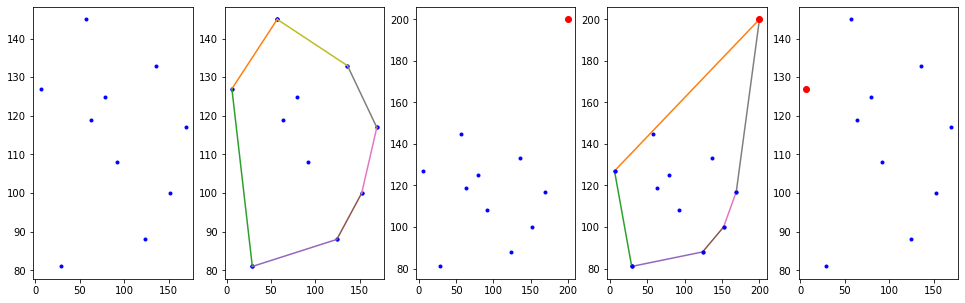

In [351]:
max = 100

fig = plt.figure(figsize=(20,5))

points = create_points_circle(max,10)
lcroot, rcroot = dynamicConvexHull(points,fig, debug=False)
lcRoots = []
rcRoots = []
lcRoots.append(lcroot)
rcRoots.append(rcroot)
#printTree(lcroot, hull="lc")   
#printTree(rcroot, hull="rc")

print("###################################### INSERT ######################################")
newNodelc = InnerNode(idd="Z", f=None,  lson=None, rson=None, maxY = 200.0, Q=[Point(200.0,200.0)], B=0)
newNoderc = InnerNode(idd="Z", f=None,  lson=None, rson=None, maxY = 200.0, Q=[Point(200.0,200.0)], B=0)
newPoint = newNodelc.Q[0]
drawINSERT(newPoint,points,fig)
rootsListlc = INSERTDOWN(lcroot, newNodelc, lcRoots,hull="lc")
rootsListrc = INSERTDOWN(rcroot, newNoderc, rcRoots,hull="rc")
if(False):
    print("PRINTING ROOTS LIST LC")
    for i in range(len(rootsListlc)):
        print("ROOT: ", rootsListlc[i].idd)
        printTree(rootsListlc[i], hull="lc")
        
if(False):
    print("PRINTING ROOTS LIST RC")
    for i in range(len(rootsListrc)):
        print("ROOT: ", rootsListrc[i].idd)
        printTree(rootsListrc[i], hull="rc")



print("###################################### UP AGAIN ######################################")
rootsListlc = MYUP(rootsListlc, hull="lc")
#rootsListlc[0].printData()

rootsListrc = MYUP(rootsListrc, hull="rc")
#rootsListrc[0].printData()
#print("ROOT: ", rootsListrc[0].idd)
#printTree(rootsListrc[i], hull="rc")

############ DRAWING RESULT ################

finalHull = []
for i in range(len(rootsListlc[0].Q)):
    finalHull.append(Point(rootsListlc[0].Q[i].x,rootsListlc[0].Q[i].y))

for i in range(len(rootsListrc[0].Q)-1,-1,-1):
    finalHull.append(Point(rootsListrc[0].Q[i].x,rootsListrc[0].Q[i].y))

#finalHull = rootsListlc[0].Q


drawRESULT(newPoint, points, finalHull, fig)

print("###################################### DELETE ######################################")
if(True):
    #randNode = np.random.random_integers(1,len(rootsList[0].Q)-1)
    randNode = 0
    #getPoint = rootsListlc[0].Q[1]
    
    #deleteNodelc = InnerNode(idd="Z", f=None,  lson=None, rson=None, maxY = getPoint.y, Q=[getPoint], B=0)
    #deleteNoderc = InnerNode(idd="Z", f=None,  lson=None, rson=None, maxY = getPoint.y, Q=[getPoint], B=0)
    
    deletePoint = rootsListlc[0].Q[0]
    drawINSERT(deletePoint,points,fig)
    rootsListlc = DELETEDOWN(rootsListlc[0], deletePoint, rootsListlc, hull="lc")
    rootsListrc = DELETEDOWN(rootsListrc[0], deletePoint, rootsListrc, hull="rc")
    if(True):
        print("PRINTING ROOTS LIST LC")
        for i in range(len(rootsListlc)):
            print("ROOT: ", rootsListlc[i].idd)
            printTree(rootsListlc[i])
            
        print("PRINTING ROOTS LIST RC")
        for i in range(len(rootsListrc)):
            print("ROOT: ", rootsListrc[i].idd)
            printTree(rootsListrc[i])
    #rootsList = INSERT(newNode, rootsList)

    print("###################################### UP AGAIN ######################################")
rootsListlc = MYUP(rootsListlc, hull="lc")
rootsListrc = MYUP(rootsListrc, hull="rc")

############ DRAWING RESULT ################

finalHull = []
for i in range(len(rootsListlc[0].Q)):
    finalHull.append(Point(rootsListlc[0].Q[i].x,rootsListlc[0].Q[i].y))

for i in range(len(rootsListrc[0].Q)-1,-1,-1):
    finalHull.append(Point(rootsListrc[0].Q[i].x,rootsListrc[0].Q[i].y))

drawRESULT(newPoint, points, finalHull, fig)